## 앙상블

- 참고 : https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

### Data load

In [3]:
df = pd.read_csv('../dataset/water_melon_data_3.csv'
                 , sep='|'
                 , header=0
                 , dtype = {
                     'COLOR': 'category'
                     , 'T_SHAPE' : 'category'
                     , 'SOUND' : 'category'
                     , 'STRIPE' : 'category'
                     , 'B_SHAPE' : 'category'
                     , 'TEXTURE' : 'category'
                     , 'DENSITY' : 'float32'
                     , 'SUGAR' : 'float32'
                     , 'Y' : 'category'
                 }
                )
df.reset_index(drop=True)
df.head()

,NO,COLOR,T_SHAPE,SOUND,STRIPE,B_SHAPE,TEXTURE,DENSITY,SUGAR,Y
0,1,청록색,말림,혼탁,선명함,움푹 패임,단단함,0.697,0.460,Y
1,2,진녹색,말림,둔탁,선명함,움푹 패임,단단함,0.774,0.376,Y
2,3,진녹색,말림,혼탁,선명함,움푹 패임,단단함,0.634,0.264,Y
3,4,청록색,말림,둔탁,선명함,움푹 패임,단단함,0.608,0.318,Y
4,5,연녹색,말림,혼탁,선명함,움푹 패임,단단함,0.556,0.215,Y


In [4]:
co_le = LabelEncoder()
ts_le = LabelEncoder()
so_le = LabelEncoder()
st_le = LabelEncoder()
bs_le = LabelEncoder()
te_le = LabelEncoder()
y_le = LabelEncoder()

x = pd.DataFrame()
x['COLOR'] = co_le.fit_transform(df['COLOR'])
x['T_SHAPE'] = ts_le.fit_transform(df['T_SHAPE'])
x['SOUND'] = so_le.fit_transform(df['SOUND'])
x['STRIPE'] = st_le.fit_transform(df['STRIPE'])
x['B_SHAPE'] = bs_le.fit_transform(df['B_SHAPE'])
x['TEXTURE'] = te_le.fit_transform(df['TEXTURE'])
x['DENSITY'] = df['DENSITY']
x['SUGAR'] = df['SUGAR']

y = pd.DataFrame()
y['Y'] = y_le.fit_transform(df['Y'])

x.shape, y.shape

((17, 8), (17, 1))

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((13, 8), (4, 8), (13, 1), (4, 1))

----

## 1. AdaBoosting

- base_estimators : 학습에 사용하는 알고리즘 (default=None → DecisionTreeClassifier(max_depth=1)가 적용)
- n_estimators : 생성할 약한 학습기의 갯수를 지정 (default=50)
- learning_rate : Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수 (default=1.0)

In [6]:
from sklearn.ensemble import AdaBoostClassifier

In [7]:
ab = AdaBoostClassifier(n_estimators=30
                        , random_state=10
                        , learning_rate=0.1
                       )

In [8]:
ab.fit(x_train, y_train)
ab_pred = ab.predict(x_test)

C:\Users\Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [9]:
print("정확도 : {0:.3f}".format(accuracy_score(y_test, ab_pred)))

정확도 : 0.750


In [10]:
print(classification_report(y_test, ab_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



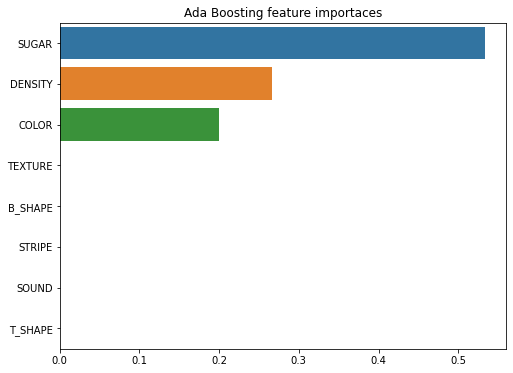

In [11]:
feature_importances = ab.feature_importances_
ft_im = pd.Series(feature_importances, index=x_train.columns)
ft_im = ft_im.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.title('Ada Boosting feature importaces')
sns.barplot(x=ft_im, y=ft_im.index)
plt.show()

## 2. GradientBoosting

#### Tree 관련 hyperparameter
- max_depth : 트리의 최대 깊이 (default=3 → 깊이가 깊어지면 과적합 가능성 상승)
- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수 (Default=2 → 과적합을 제어하는데 사용)
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수 (default=1 → 과적합을 제어하는데 사용)
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수 (default=None → 모든 피처 사용)
- max_leaf_nodes : 리프노드의 최대 개수 (default=None → 제한없음)

#### Boosting 관련 hyperparameter
- loss : 경사하강법에서 사용할 cost function 지정 (default=deviance)
- n_estimators : 생성할 트리의 갯수를 지정 (default=100)
- learning_rate : Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수 (default=0.1)
- subsample : 개별 트리가 학습에 사용하는 데이터 샘플링 비율(0~1) (default=1 → 전체 데이터 학습)

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

In [13]:
gb = GradientBoostingClassifier(n_estimators=30
                                , random_state=10
                                , learning_rate=0.1
                               )

In [14]:
gb.fit(x_train, y_train)
gb_pred = gb.predict(x_test)

C:\Users\Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [15]:
print("정확도 : {0:.3f}".format(accuracy_score(y_test, gb_pred)))

정확도 : 0.750


In [16]:
print(classification_report(y_test, gb_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



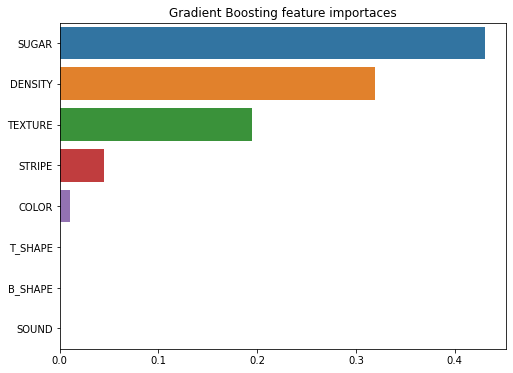

In [29]:
feature_importances = gb.feature_importances_
ft_im = pd.Series(feature_importances, index=x_train.columns)
ft_im = ft_im.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.title('Gradient Boosting feature importaces')
sns.barplot(x=ft_im, y=ft_im.index)
plt.show()

## 3. Bagging

- base_estimators : 학습에 사용하는 알고리즘 (default=None → DecisionTreeClassifier(max_depth=1)가 적용)
- n_estimators : 생성할 약한 학습기의 갯수를 지정 (default=50)
- max_samples : 추정향 훈련을 위한 최소한의 샘플 데이터수 (default=1.0)
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수 (default=None → 모든 피처 사용)

In [18]:
from sklearn.ensemble import BaggingClassifier

In [19]:
bg = BaggingClassifier(n_estimators=30
                        , random_state=10
                       )

In [20]:
bg.fit(x_train, y_train)
bg_pred = bg.predict(x_test)

C:\Users\Lee\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [21]:
print("정확도 : {0:.3f}".format(accuracy_score(y_test, bg_pred)))

정확도 : 0.750


In [22]:
print(classification_report(y_test, bg_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



## 4. RandomForest

- max_depth : 트리의 최대 깊이 (default=3 → 깊이가 깊어지면 과적합 가능성 상승)
- min_samples_split : 노드를 분할하기 위한 최소한의 샘플 데이터수 (Default=2 → 과적합을 제어하는데 사용)
- min_samples_leaf : 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수 (default=1 → 과적합을 제어하는데 사용)
- max_features : 최적의 분할을 위해 고려할 최대 feature 개수 (default=None → 모든 피처 사용)
- max_leaf_nodes : 리프노드의 최대 개수 (default=None → 제한없음)


In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf = RandomForestClassifier(n_estimators=30
                            , random_state=10
                            )

In [25]:
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

<ipython-input-25-89775bca477e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train, y_train)


In [26]:
print("정확도 : {0:.3f}".format(accuracy_score(y_test, rf_pred)))

정확도 : 0.750


In [27]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



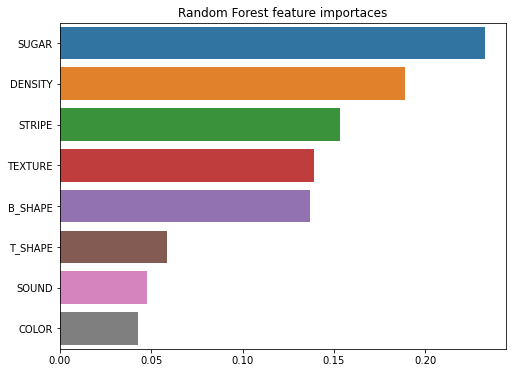

In [31]:
feature_importances = rf.feature_importances_
ft_im = pd.Series(feature_importances, index=x_train.columns)
ft_im = ft_im.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.title('Random Forest feature importaces')
sns.barplot(x=ft_im, y=ft_im.index)
plt.show()